In [2]:
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# f = open('section.txt')
# pointsList = []
# for line in f.readlines():
#     line = line.split('\n')[0]
#     coords = line.split(",")
#     pointsList.append([float(coords[0][1:]), float(coords[1][1:(len(coords[1])-1)])])
# points = np.array(pointsList)
# print(points)

In [71]:
f = open('section.txt')
# f2 = open('sectionW.txt', 'w')
pointsList = []
for line in f.readlines():
    line = line[8:(len(line)-3)]
    coords = line.split(",")
    pointsList.append((float(coords[0])+100.0, float(coords[1])))
    # f2.write(coords[0])
    # f2.write(', ')
    # f2.write(coords[1])
    # f2.write('\n')
points = np.array(pointsList)
print(points)

[[129.93390274 144.91412354]
 [128.46310043 143.55885315]
 [126.99229431 142.20359802]
 [125.5214901  140.84832764]
 [124.05068588 139.49307251]
 [122.57987976 138.13781738]
 [121.10907555 136.782547  ]
 [119.63827133 135.42729187]
 [118.16746712 134.07202148]
 [116.696661   132.71676636]
 [115.22585678 131.36151123]
 [113.75505257 130.00624084]
 [112.28424835 128.65098572]
 [110.81344223 127.29571533]
 [109.34263992 125.94046021]
 [107.8718338  124.58518982]
 [106.40102768 123.22993469]
 [104.93099976 121.87382507]
 [103.46585083 120.51246643]
 [102.00616455 119.14524841]
 [100.55194092 117.77220154]
 [ 99.10321045 116.39335632]
 [ 97.66003418 114.00874329]
 [ 96.2203207  112.6204834 ]
 [ 94.86745262 110.14909363]
 [ 93.69953728 106.52698517]
 [ 92.73321342 103.77728271]
 [ 91.98224831 100.92490387]
 [ 91.55734119  97.99624634]
 [ 91.2659708   97.0187912 ]
 [ 91.11212158  97.02069092]
 [ 91.12567272  95.02230072]
 [ 91.13922386  93.02391052]
 [ 91.39599895  91.02471924]
 [ 91.45277405

In [85]:
def exp(t, a, b): return a*np.exp(b*t)
def log(t, a, b): return a+b*np.log(t)

def hill_equation(S, Vmax, Kd, n):
    # S = np.clip(S, 1e-10, None)
    val = (Vmax * (S**n)) / (Kd**n + S**n)
    print(val)
    return val

def cubic(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [95]:
def fitFunc(S, Vmax, Kd, n):
    # return cubic(x, a, b, c, d)
    return hill_equation(S, Vmax, Kd, n)

In [93]:
Vmax_guess = max(points[:, 1])
Kd_guess = points[:, 0][np.argmin(np.abs(points[:, 1] - Vmax_guess / 2))]
n_guess = 1.0

In [96]:
params, est_covariant = scipy.optimize.curve_fit(fitFunc,  points[:, 0],  points[:, 1],  p0=(Vmax_guess, Kd_guess, n_guess), bounds = (0, np.inf))
print(params)

[84.91970419 84.51908584 84.11308014 83.70157927 83.28447039 82.8616375
 82.43296309 81.9983247  81.55759698 81.1106505  80.65735386 80.19757018
 79.73115919 79.25797595 78.77787377 78.29069721 77.79629006 77.29475762
 76.78737576 76.27425683 75.75531395 75.2304697  74.69965699 74.16199841
 73.64921366 73.20051674 72.82497468 72.53040028 72.36265684 72.24718053
 72.18605837 72.19144618 72.19683319 72.29875885 72.32125689 72.34374138
 72.36621156 72.38866783 72.40969734 72.42705943 72.44073828 72.45073804
 72.45706177 72.45971138 72.45868769 72.45397834 72.44560598 72.43355602
 72.41781274 72.39839546 72.3752862  72.34846583 72.31795031 72.28371824
 72.24577126 72.2040735  72.15863641 72.10944605 72.05647512 71.99971946
 71.93914933 71.8747704  71.80653825 71.73451068 71.66113389 71.58760981
 71.51393799 71.44011798 71.36614933 71.28764582 71.19120243 71.07579924
 70.94131878]
[84.91970546 84.5190871  84.11308139 83.70158052 83.28447163 82.86163874
 82.43296432 81.99832592 81.5575982  8

In [97]:
fit_A = params[0]
fit_B = params[1]
fit_C = params[2]
# fit_D = params[3]
print(fit_A, fit_B, fit_C)

129.20093410675298 91.24265989503003 68.62983249440619


In [98]:
fit_y = fitFunc(points[:, 0], fit_A, fit_B, fit_C)

[129.2009341  129.2009341  129.20093409 129.20093407 129.20093402
 129.2009339  129.20093364 129.20093302 129.20093157 129.20092812
 129.2009198  129.20089956 129.20084972 129.20072552 129.20041227
 129.19961227 129.19754287 129.19212358 129.17781021 129.13963967
 129.03685694 128.75766948 127.99502782 125.91347749 120.86181342
 111.24080123  97.22605024  82.05231912  72.19725014  65.16672361
  61.42929138  61.75825147  62.08731037  68.31863095  69.68880373
  71.0535623   72.41166371  73.7619589   75.01912099  76.05101439
  76.85979953  77.44855618  77.81974175  77.9749981   77.91503306
  77.63886477  77.14666603  76.43561563  75.50216377  74.34442685
  72.95822572  71.33962929  69.4876853   67.4006762   65.08049804
  62.52977841  59.75791453  56.7774632   53.60564537  50.26710725
  46.79128103  43.21576375  39.58082235  35.93629215  32.44341413
  29.17742438  26.14544273  23.3495211   20.78728171  18.32158666
  15.63168683  12.86697854  10.20081467]


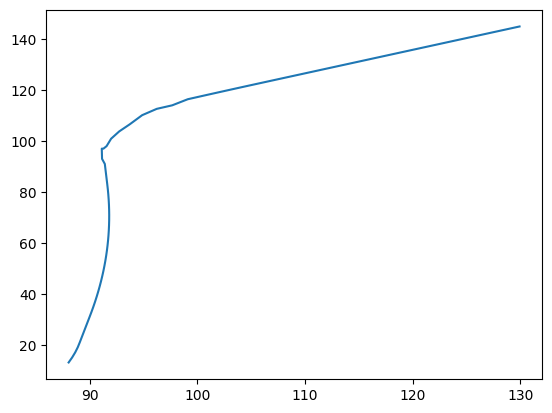

In [99]:
plt.plot(points[:, 0], points[:, 1])

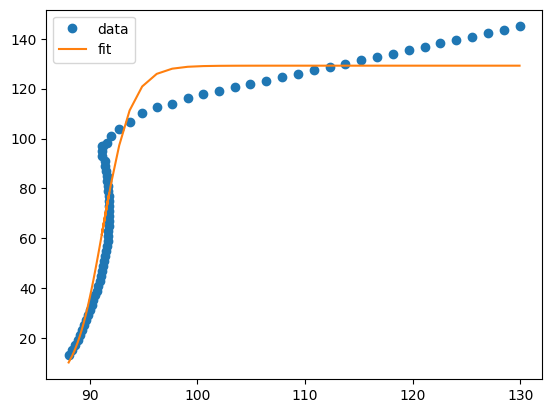

In [100]:
plt.plot(points[:, 0], points[:, 1], 'o', label='data')
plt.plot(points[:, 0], fit_y, '-', label='fit')
plt.legend()